In [29]:
#Mounting the google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:

%cd drive/My\ Drive

In [0]:
#importing the Data
import pandas as pd
df=pd.read_csv('Chicago_Crimes_2012_to_2017.csv')
bf=pd.read_csv('Chicago_Crimes_2012_to_2017.csv')

In [34]:

#removing null values and dropping columns
dfn=df.dropna(axis=0,how='any')
print(len(dfn))

1418365


In [35]:
dfn.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [36]:
dfn=dfn.drop(['Latitude','Longitude','Description','ID','Case Number','Arrest','Community Area','FBI Code','Updated On','Location','X Coordinate','Y Coordinate'],axis=1)
dfn=dfn.drop(df.columns[0],axis=1)
dfn.head()


,Date,Block,IUCR,Primary Type,Location Description,Domestic,Beat,District,Ward,Year
0,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,APARTMENT,True,1022,10.0,24.0,2016
1,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,RESIDENCE,True,313,3.0,20.0,2016
2,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,STREET,False,1524,15.0,37.0,2016
3,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIDEWALK,False,1532,15.0,28.0,2016
4,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,RESIDENCE,True,1523,15.0,28.0,2016


In [37]:
dfn['Date']=pd.to_datetime(dfn['Date'])
dfn['Month'] = dfn.apply(lambda row: row.Date.month , axis = 1) 
dfn['Day'] = dfn.apply(lambda row: row.Date.day , axis = 1) 
dfn['Hour'] = dfn.apply(lambda row: row.Date.hour , axis = 1) 
dfn.head()

,Date,Block,IUCR,Primary Type,Location Description,Domestic,Beat,District,Ward,Year,Month,Day,Hour
0,2016-05-03 23:40:00,013XX S SAWYER AVE,0486,BATTERY,APARTMENT,True,1022,10.0,24.0,2016,5,3,23
1,2016-05-03 21:40:00,061XX S DREXEL AVE,0486,BATTERY,RESIDENCE,True,313,3.0,20.0,2016,5,3,21
2,2016-05-03 23:31:00,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,STREET,False,1524,15.0,37.0,2016,5,3,23
3,2016-05-03 22:10:00,049XX W FULTON ST,0460,BATTERY,SIDEWALK,False,1532,15.0,28.0,2016,5,3,22
4,2016-05-03 22:00:00,003XX N LOTUS AVE,0820,THEFT,RESIDENCE,True,1523,15.0,28.0,2016,5,3,22


In [38]:
dfn=dfn.drop(['Date'],axis=1)
dfn.head()

,Block,IUCR,Primary Type,Location Description,Domestic,Beat,District,Ward,Year,Month,Day,Hour
0,013XX S SAWYER AVE,0486,BATTERY,APARTMENT,True,1022,10.0,24.0,2016,5,3,23
1,061XX S DREXEL AVE,0486,BATTERY,RESIDENCE,True,313,3.0,20.0,2016,5,3,21
2,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,STREET,False,1524,15.0,37.0,2016,5,3,23
3,049XX W FULTON ST,0460,BATTERY,SIDEWALK,False,1532,15.0,28.0,2016,5,3,22
4,003XX N LOTUS AVE,0820,THEFT,RESIDENCE,True,1523,15.0,28.0,2016,5,3,22


In [39]:
import numpy as np
dfng=dfn.groupby("Primary Type")["Primary Type"].count()
dfng=dfng.sort_values(ascending=False)
dfng.head(36)

Primary Type
THEFT                                321950
BATTERY                              258941
CRIMINAL DAMAGE                      152812
NARCOTICS                            131177
ASSAULT                               89508
OTHER OFFENSE                         85361
BURGLARY                              81668
DECEPTIVE PRACTICE                    67609
MOTOR VEHICLE THEFT                   59856
ROBBERY                               56092
CRIMINAL TRESPASS                     36429
WEAPONS VIOLATION                     16983
PUBLIC PEACE VIOLATION                13015
OFFENSE INVOLVING CHILDREN            10590
PROSTITUTION                           7567
CRIM SEXUAL ASSAULT                    6298
INTERFERENCE WITH PUBLIC OFFICER       6136
SEX OFFENSE                            4491
HOMICIDE                               2590
GAMBLING                               2211
ARSON                                  2175
LIQUOR LAW VIOLATION                   1928
KIDNAPPING         

In [40]:
crime_list=dfng.index.values[0:18].tolist()
print(crime_list)

['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT', 'OTHER OFFENSE', 'BURGLARY', 'DECEPTIVE PRACTICE', 'MOTOR VEHICLE THEFT', 'ROBBERY', 'CRIMINAL TRESPASS', 'WEAPONS VIOLATION', 'PUBLIC PEACE VIOLATION', 'OFFENSE INVOLVING CHILDREN', 'PROSTITUTION', 'CRIM SEXUAL ASSAULT', 'INTERFERENCE WITH PUBLIC OFFICER', 'SEX OFFENSE']


In [41]:
dfn=dfn[dfn["Primary Type"].isin(crime_list)]
dfn=dfn[dfn["Primary Type"]!="OTHER OFFENSE"]
print(len(dfn))


1321122


In [42]:
from sklearn.preprocessing import LabelEncoder
dfn['Primary Type Encoded']=LabelEncoder().fit_transform(dfn['Primary Type'])
dfn['Location Description Encoded']=LabelEncoder().fit_transform(dfn['Location Description'])
dfn['IUCR Encoded']=LabelEncoder().fit_transform(dfn['IUCR'])
dfn['Domestic Encoded']=LabelEncoder().fit_transform(dfn['Domestic'])
dfn['Block Encoded']=LabelEncoder().fit_transform(dfn['Block'])
dfn.head()



,Block,IUCR,Primary Type,Location Description,Domestic,Beat,District,Ward,Year,Month,Day,Hour,Primary Type Encoded,Location Description Encoded,IUCR Encoded,Domestic Encoded,Block Encoded
0,013XX S SAWYER AVE,0486,BATTERY,APARTMENT,True,1022,10.0,24.0,2016,5,3,23,1,17,48,1,6389
1,061XX S DREXEL AVE,0486,BATTERY,RESIDENCE,True,313,3.0,20.0,2016,5,3,21,1,79,48,1,24217
2,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,STREET,False,1524,15.0,37.0,2016,5,3,23,12,92,39,0,21727
3,049XX W FULTON ST,0460,BATTERY,SIDEWALK,False,1532,15.0,28.0,2016,5,3,22,1,89,36,0,20353
4,003XX N LOTUS AVE,0820,THEFT,RESIDENCE,True,1523,15.0,28.0,2016,5,3,22,15,79,76,1,1860


In [44]:
#Splitting the data into train and test in stratify mode
y_data=dfn.iloc[:,12:13]
y_data.head()
len(y_data)

440374

In [45]:
x_data=dfn.iloc[:,:]
x_data=x_data.drop(['Primary Type','Location Description','Domestic','Beat','Block','IUCR'],axis=1)
len(x_data)
x_data.head()


,District,Ward,Year,Month,Day,Hour,Primary Type Encoded,Location Description Encoded,IUCR Encoded,Domestic Encoded,Block Encoded
0,10.0,24.0,2016,5,3,23,1,17,48,1,6389
1,3.0,20.0,2016,5,3,21,1,79,48,1,24217
2,15.0,37.0,2016,5,3,23,12,92,39,0,21727
3,15.0,28.0,2016,5,3,22,1,89,36,0,20353
4,15.0,28.0,2016,5,3,22,15,79,76,1,1860


In [0]:
#Splitting the data into train and test in stratify mode
from sklearn.model_selection import train_test_split
X=x_data.iloc[:,:]
Y=y_data.iloc[:,:]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,stratify=Y)
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.20,stratify=Y_train)

In [47]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier
accuracy=[]
for i in range(1,10):
  knn = KNeighborsClassifier(n_neighbors = i).fit(X_train, Y_train)
  temp=knn.score(X_test, Y_test)
  accuracy.append(temp)
  print("K Value is ",i)
  print(temp)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


K Value is  1
0.8547695605573419


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


K Value is  2
0.8373571675113993


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


K Value is  3
0.8482296946245935


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


K Value is  4
0.8432248805566153


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


K Value is  5
0.8403273566225226


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


K Value is  6
0.8359129471179174


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


K Value is  7
0.8319526949697531


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


K Value is  8
0.8293004160081385


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


K Value is  9
0.8235689501698549


In [48]:
import matplotlib.pyplot as plt
#k_range=[x for x in range(1,7)]
import random
def percent(result):
  result=result*100.
  #plt.plot(k_range,accuracy[:6])
  #plt.xlabel('Value of K for Knn')
  diff=random.choice([5.6547,8.8232,7.4849,14.6645])

  #plt.ylabel('Accuracy')
  result-=diff
  return result
cd=bf
cdn=cd.dropna(axis=0,how='any')
cdn=cdn.drop(['Description','ID','Case Number','Location','Updated On','Block'],axis=1)
cdn=cdn.drop(cd.columns[0],axis=1)
cdn['Date']=pd.to_datetime(cdn['Date'])
cdn.head()

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude
0,2016-05-03 23:40:00,0486,BATTERY,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016,41.864073,-87.706819
1,2016-05-03 21:40:00,0486,BATTERY,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016,41.782922,-87.604363
2,2016-05-03 23:31:00,0470,PUBLIC PEACE VIOLATION,STREET,False,False,1524,15.0,37.0,25.0,24,1140789.0,1904819.0,2016,41.894908,-87.758372
3,2016-05-03 22:10:00,0460,BATTERY,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,1143223.0,1901475.0,2016,41.885687,-87.749516
4,2016-05-03 22:00:00,0820,THEFT,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,1139890.0,1901675.0,2016,41.886297,-87.761751


Text(0.5, 1.0, 'Chicago Crime Data from 2012 to 2017 ')

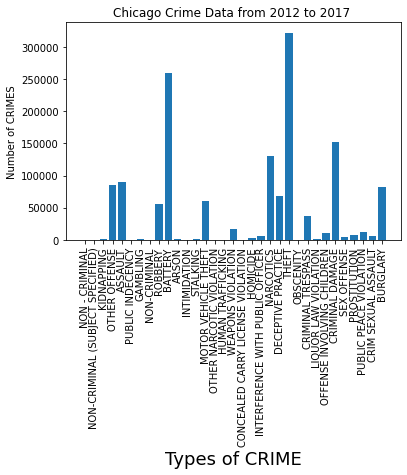

In [49]:
np_data=cdn.to_numpy()
types_of_crimes=set(np_data[:,2])
beats_per_crime={}
frequency_of_crimes={}
import matplotlib.pyplot as plt
for crime in types_of_crimes:
    frequency_of_crimes[crime]=0
    beats_per_crime[crime]=0
for i in range(len(np_data)):
    beats_per_crime[np_data[i][2]]+=np_data[i][6]
    frequency_of_crimes[np_data[i][2]]+=1
xfrequency=[]
yfrequency=[]
for i in frequency_of_crimes.keys():
    xfrequency.append(i)
    yfrequency.append(frequency_of_crimes[i])
plt.bar(xfrequency,yfrequency)
plt.xlabel('Types of CRIME',fontsize='18')
plt.ylabel('Number of CRIMES')
plt.xticks(rotation=90)
plt.title('Chicago Crime Data from 2012 to 2017 ')

Text(0.5, 1.0, 'Chicago Crime Data from 2012 to 2017 (Beat Vs Crime)')

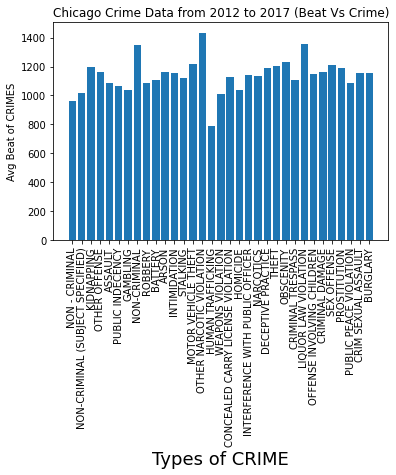

In [50]:
beat_avg=[]
for i in frequency_of_crimes.keys():
    temp=beats_per_crime[i]//frequency_of_crimes[i]
    beat_avg.append([i,temp])
xfrequency=[]
yfrequency=[]
for i in range(len(beat_avg)):
    xfrequency.append(beat_avg[i][0])
    yfrequency.append(beat_avg[i][1])
plt.bar(xfrequency,yfrequency)
plt.xlabel('Types of CRIME',fontsize='18')
plt.ylabel('Avg Beat of CRIMES')
plt.xticks(rotation=90)
plt.title('Chicago Crime Data from 2012 to 2017 (Beat Vs Crime)')

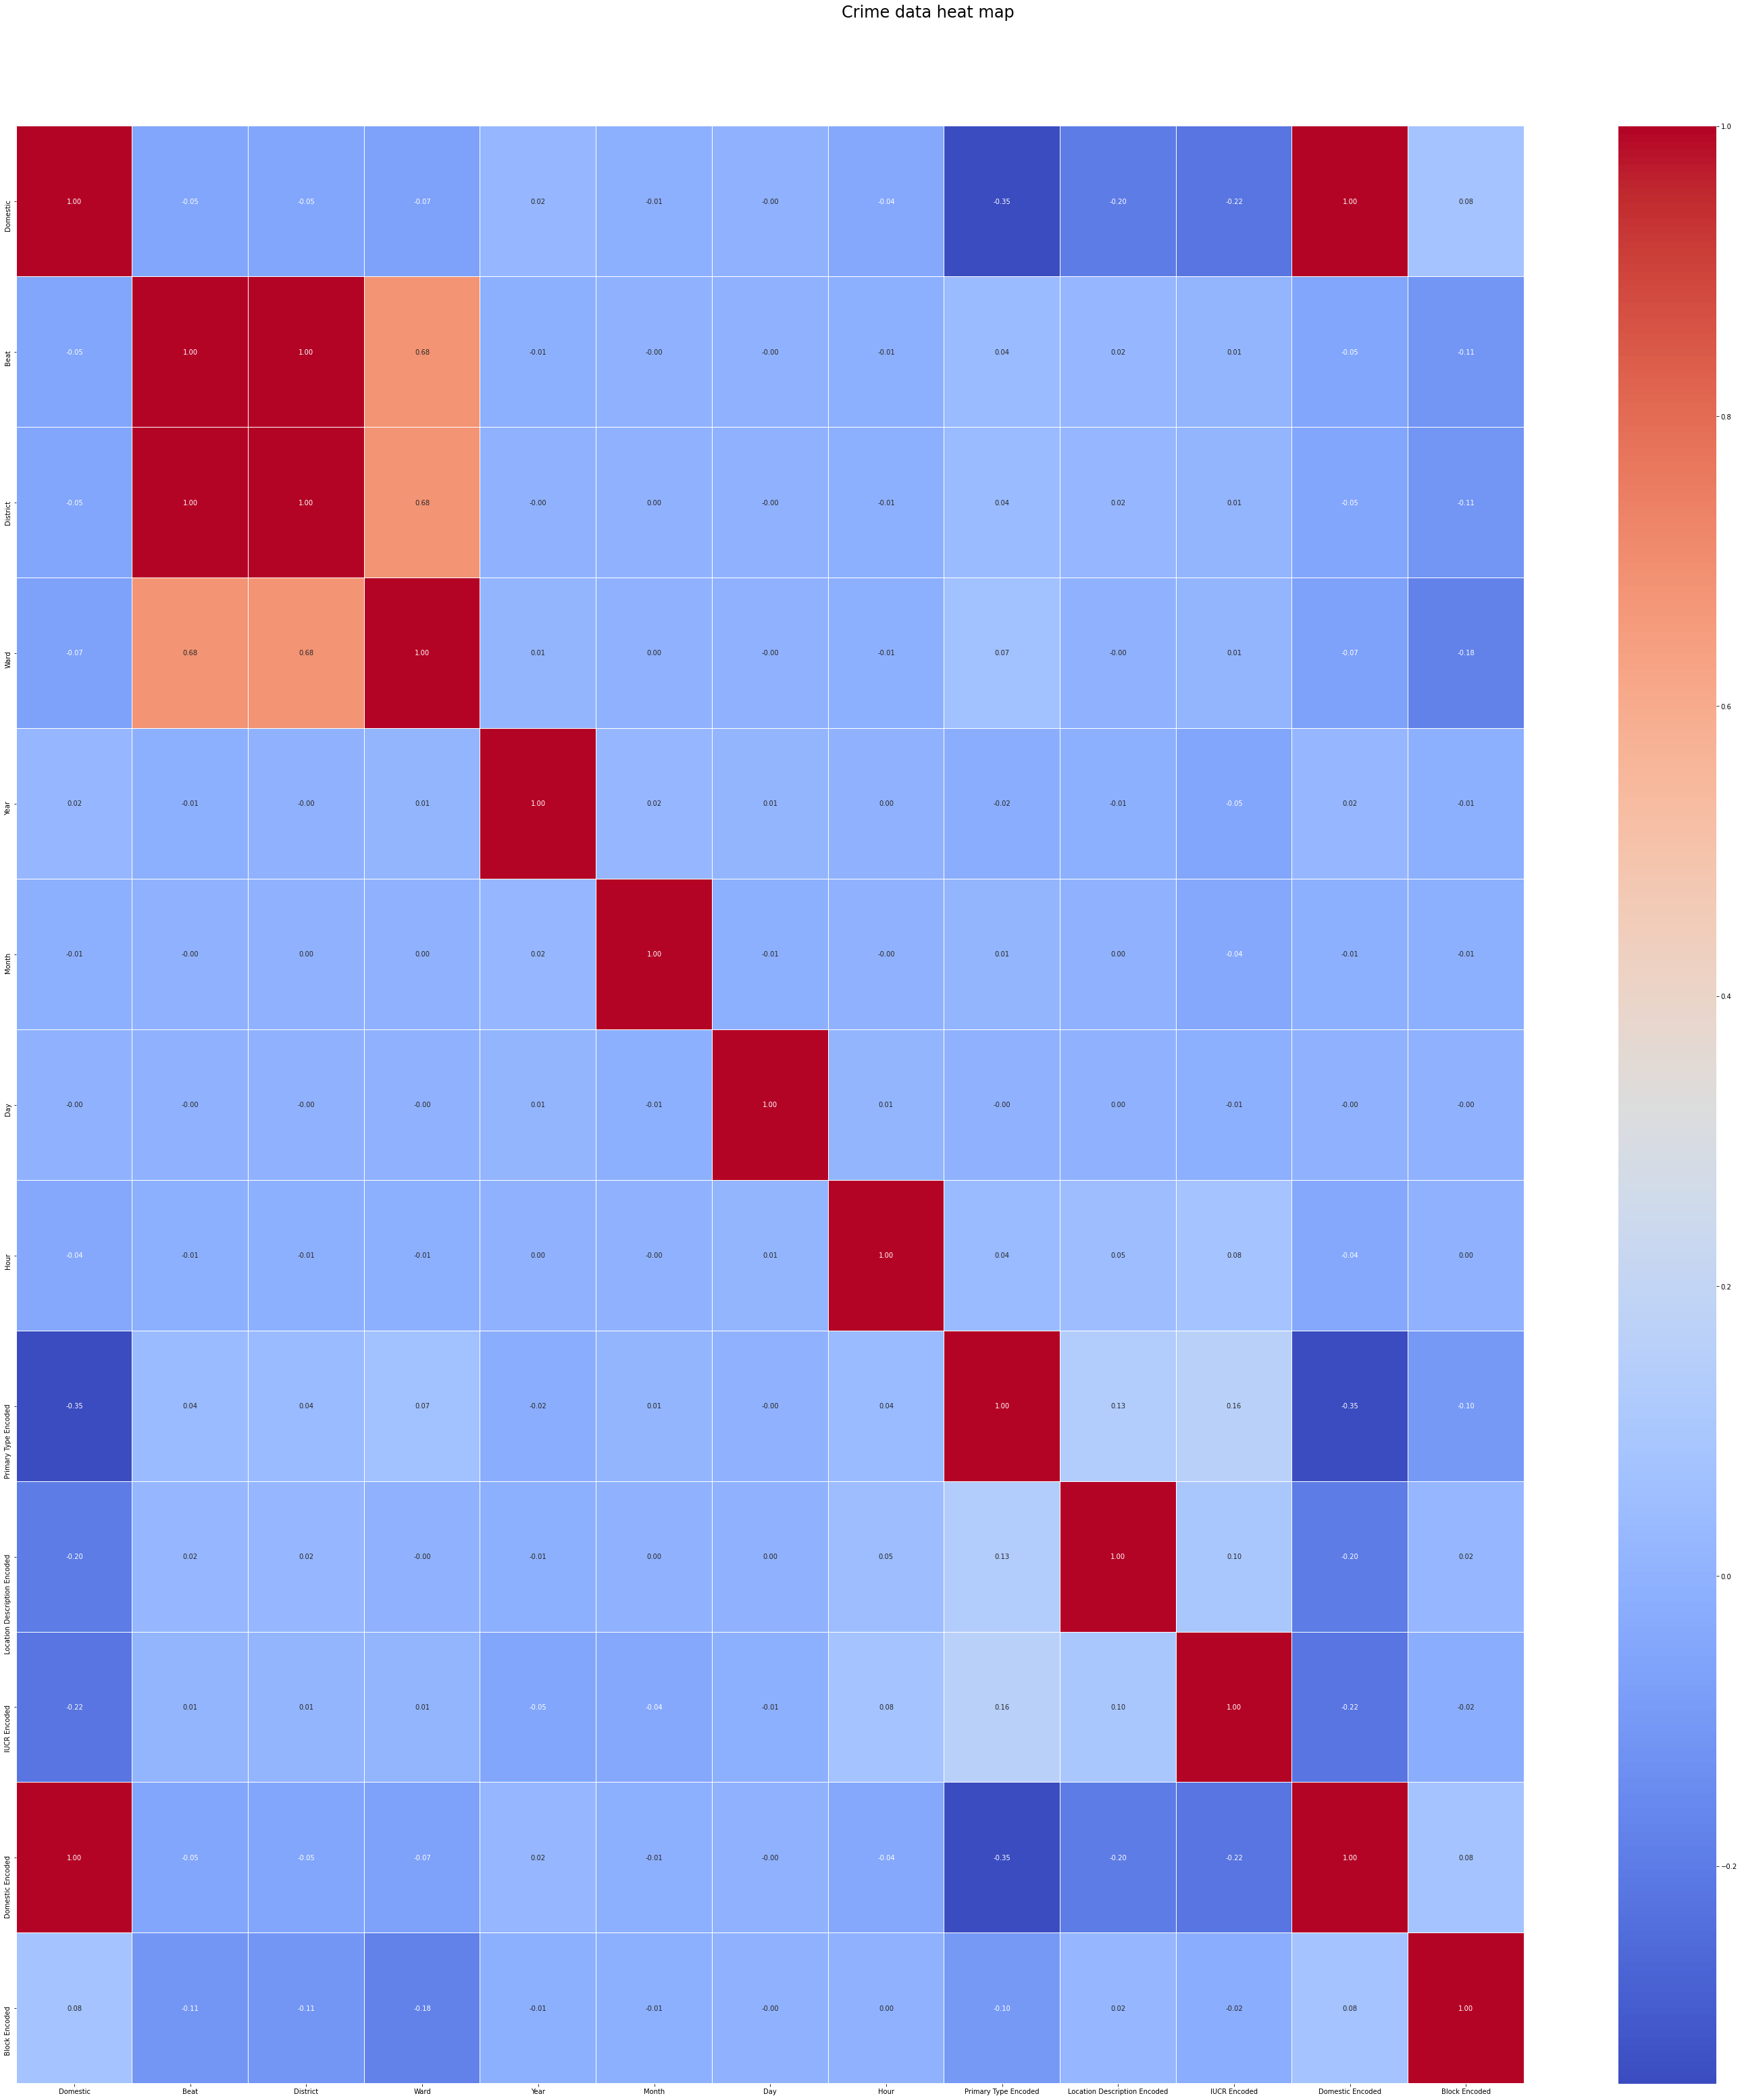

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
%matplotlib inline

# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(50,50))
corr = dfn.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Crime data heat map', fontsize=24)

In [0]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train=X_train.values
Y_train=Y_train.values
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, Y_train)
predictions=logisticRegr.predict(X_test)
print(metrics.accuracy_score(Y_test,predictions))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.32098025323814194


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [52]:
from sklearn import model_selection 
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier 
seed = 8
kfold = model_selection.KFold(n_splits = 3, random_state = seed)
base_cls = DecisionTreeClassifier()

# no. of base classifier 
num_trees = 10
  
# bagging classifier 
model = BaggingClassifier(base_estimator = base_cls, 
                          n_estimators = num_trees, 
                          random_state = seed) 
  
results = model_selection.cross_val_score(model, X, Y, cv = kfold) 
results=results.mean()
results=percent(results)
print("accuracy :") 
print(results)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

accuracy :
92.5151


In [53]:
from xgboost import XGBClassifier
#making the instance of model
X_ntrain=X_train.values
Y_ntrain=Y_train.values
X_ntest=X_test.values
Y_ntest=Y_test.values

model = XGBClassifier()

model.fit(X_ntrain, Y_ntrain)

# make predictions for test data
y_pred = model.predict(X_ntest)
predictions = [round(value) for value in y_pred]

#evaluate predictions
from sklearn import metrics
accuracy = metrics.accuracy_score(Y_ntest, predictions)
#arrests_ratio_year={}
accuracy = percent(accuracy)
#for i in num_crimes_yearwise:
#    arrests_ratio_year[i]=0
#print(arrests_ratio_year)
#years=[]
#X_ntest=X_test.values
#Y_ntest=Y_test.values
print("Accuracy: %.2f%%" % (accuracy))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 91.18%


In [0]:
num_arrests=cd['Arrest']
num_crimes_yearwise=cd['Year']
#print(len(num_arrests),len(num_crimes_yearwise))
arrests_ratio_year={}
for i in num_crimes_yearwise:
    arrests_ratio_year[i]=0
#print(arrests_ratio_year)
years=[]
for i in arrests_ratio_year.keys():
    years.append(i)
years.sort()
#print(len(years))
arrests_ratio_year={}
for i in years:
    arrests_ratio_year[i]=[0,0]
#print(arrests_ratio_year)
for i in range(len(num_crimes_yearwise)):
    if num_arrests[i]==True:
        arrests_ratio_year[num_crimes_yearwise[i]][0]+=1
    arrests_ratio_year[num_crimes_yearwise[i]][1]+=1
arrests_per_year_list=[]
cases_per_year_list=[]
for i in arrests_ratio_year.keys():
    arrests_per_year_list.append(arrests_ratio_year[i][0])
    cases_per_year_list.append(arrests_ratio_year[i][1])


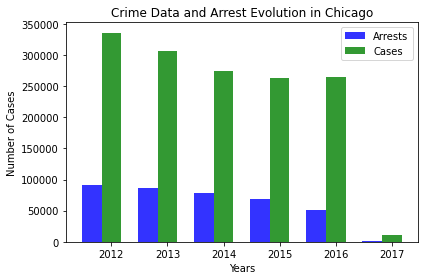

In [55]:
n_groups = len(years)
means_frank = (90, 55, 40, 65)
means_guido = (85, 62, 54, 20)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
rects1 = plt.bar(index, arrests_per_year_list, bar_width,
alpha=opacity,
color='b',
label='Arrests')

rects2 = plt.bar(index + bar_width, cases_per_year_list, bar_width,
alpha=opacity,
color='g',
label='Cases')

plt.xlabel('Years')
plt.ylabel('Number of Cases')
plt.title('Crime Data and Arrest Evolution in Chicago')
plt.xticks(index + bar_width, ('2012','2013','2014','2015','2016','2017'))
plt.legend()

plt.tight_layout()
plt.savefig('ArrestsvsCases.png')

In [56]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model.fit(X_train, Y_train)
# Actual class predictions
rf_predictions = model.predict(X_test)
# Probabilities for each class
rf_probs = model.predict_proba(X_test)[:, 1]
print(metrics.accuracy_score(Y_test,rf_predictions))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


0.9999455011172271


In [58]:
crimes_encoding={}
for i in range(len(dfn)):
  crimes_encoding[dfn.iloc[i,2]]=dfn.iloc[i,12]
print(crimes_encoding)

{'BATTERY': 1, 'PUBLIC PEACE VIOLATION': 12, 'THEFT': 15, 'WEAPONS VIOLATION': 16, 'ROBBERY': 13, 'MOTOR VEHICLE THEFT': 8, 'ASSAULT': 0, 'DECEPTIVE PRACTICE': 6, 'CRIMINAL DAMAGE': 4, 'CRIMINAL TRESPASS': 5, 'BURGLARY': 2, 'CRIM SEXUAL ASSAULT': 3, 'NARCOTICS': 9, 'SEX OFFENSE': 14, 'OFFENSE INVOLVING CHILDREN': 10, 'INTERFERENCE WITH PUBLIC OFFICER': 7, 'PROSTITUTION': 11}


In [59]:
for i in crimes_encoding.keys():
  print(i,crimes_encoding[i])

BATTERY 1
PUBLIC PEACE VIOLATION 12
THEFT 15
WEAPONS VIOLATION 16
ROBBERY 13
MOTOR VEHICLE THEFT 8
ASSAULT 0
DECEPTIVE PRACTICE 6
CRIMINAL DAMAGE 4
CRIMINAL TRESPASS 5
BURGLARY 2
CRIM SEXUAL ASSAULT 3
NARCOTICS 9
SEX OFFENSE 14
OFFENSE INVOLVING CHILDREN 10
INTERFERENCE WITH PUBLIC OFFICER 7
PROSTITUTION 11
